# A 1D Diffusion Model

Here we develop a one-dimensional model of diffusion.
It assumes a constant diffusivity
It uses a regular grid
It has a step function for an initial condition.
It has  fixed boundary conditions.

Here is the diffusion equation:

$$ \frac{\partial C}{\partial t} = D\frac{\partial^2 C}{\partial x^2} $$



Here is the  discretized version of the diffusion equation we will solve with our model

$$ C^{t+1}_x = C^t_x + {D \Delta t \over \Delta x^2} (C^t_{x+1} - 2C^t_x + C^t_{x-1}) $$

This is the FTCS scheme as described by Slingerland and kump (2011)

We will use two libraries, Numpy (for arrays) and matplotlib (fro plotting), that are not a part of the core python distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Start by setting two fixed model parameters, the diffusivity and the size of the model domain.

In [2]:
D=100
Lx=300

Next, set up the model using a numpy array

In [3]:
dx=0.5
x=np.arange(start=0, stop=Lx, step=dx)
nx=len(x)

In [4]:
nx

600

In [5]:
x

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

In [6]:
#x[0]

In [7]:
#x[1]

To get last element its negative -1 and for the second last it is -2

In [8]:
#x[-1]

In [9]:
#x[-2]

To get first 5 elements

In [10]:
#x[0:4]

python is inclusive in left side but exclusive in right side, so if i want to get first 5 I need to use o:5

In [11]:
#x[0:5]

In [12]:
#x[-5:]

Now back to model. Set the initial conditions for the model.
The cake 'C' is a step function with a high value of the left, a low value on the right, and a step at the center of the domain.

In [13]:
C = np.zeros_like(x)
C_left = 500
C_right = 0
C[x<=Lx/2] = C_left
C[x>Lx/2] = C_right

In [14]:
C

array([500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 50

Plot the initial profile

Text(0.5, 1.0, 'initial Profile')

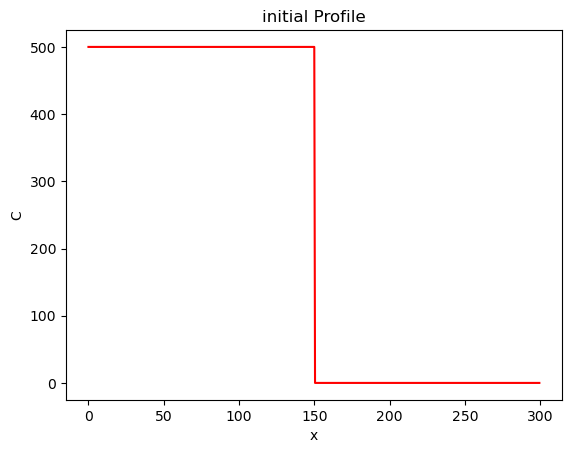

In [15]:
plt.figure()
plt.plot(x, C, "r")
plt.xlabel("x")
plt.ylabel("C")
plt.title("initial Profile")

Set the number of the time steps in the model.
calculate a stable time step using a stability criterion.

In [16]:
nt=5000
dt=0.5*dx**2/D

In [17]:
dt

0.00125

Loop over the time steps of the model. solving the difusion equation using the FTC scheme shown above
Note the use of array operations on the variables 'C'. the boundary conditions remain fixed in each time step

In [18]:
for t in range(0, nt):
	C[1:-1] += D * dt / dx ** 2 * (C[:-2] - 2*C[1:-1] + C[2:])

In [19]:
#z=list(range(5))

In [20]:
#z

In [21]:
#z[1:-1]

In [22]:
#z[:-2]

In [23]:
#z[2:]

plot the result

Text(0.5, 1.0, 'Final Profile')

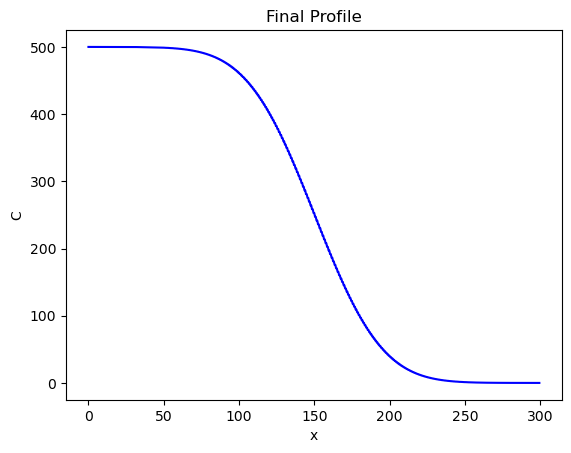

In [24]:
plt.plot(x, C, "b")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Final Profile")